################################ Base MNIST ################################


# Autoencoder con MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os



In [ ]:
input_shape = (128, 128, 1)  # Tamaño de las imágenes

model_path = "autoencoder_model.keras"  # Nombre del archivo del modelo guardado

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train.astype("float32") / 255.0, axis=-1)
x_test = np.expand_dims(x_test.astype("float32") / 255.0, axis=-1)
x_train = tf.image.resize(x_train, (128 ,128))
x_test = tf.image.resize(x_test, (128 ,128))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print("Shape de x_train:", x_train.shape)

Shape de x_train: (60000, 128, 128, 1)


In [ ]:
latent_dim = 4  #espacio latente

# Encoder
encoder_inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, (3, 3), activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(256, (3, 3), activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
z = layers.Dense(latent_dim, activation="relu", name="z_mean")(x)

encoder = keras.Model(encoder_inputs, z, name="encoder")

encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ z_mean (Dense)                       │ (None, 4)                   │          65,540 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 453,380 (1.73 MB)

 Trainable params: 453,380 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 256, activation="relu")(latent_inputs)
x = layers.Reshape((8, 8, 256))(x)
x = layers.Conv2DTranspose(128, (3, 3), activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16384)               │          81,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 128, 128, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 128, 128, 1)         │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 473,985 (1.81 MB)

 Trainable params: 473,985 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#AE y su train_step()
class AE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape(persistent=True) as tape:
            z = self.encoder(data)
            #z = self.sampler(z_mean, z_log_var)

            reconstruction = decoder(z)
            g = tape.gradient(reconstruction,z)
            L2 = tf.norm(g)
            #sum= tf.reduce_sum(g)
            #mean= tf.reduce_mean(g)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            total_loss = reconstruction_loss + L2

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
              }

In [ ]:
ae = AE(encoder, decoder)
ae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001 )) #, run_eagerly=True)
ae.fit(x_train, epochs=100, batch_size=2*128)

encoder.save("encoder_mnist.h5")
decoder.save("decoder_mnist.h5")

dir = "/content/drive/MyDrive/Colab Notebooks/"
encoder.save(dir + "encoder_mnist.keras")
decoder.save(dir + "decoder_mnist.keras")

Epoch 1/100


235/235 ━━━━━━━━━━━━━━━━━━━━ 71s 241ms/step - reconstruction_loss: 9869.9805 - total_loss: 9909.3838
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 217ms/step - reconstruction_loss: 4383.1172 - total_loss: 4416.4629
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - reconstruction_loss: 4337.4365 - total_loss: 4356.4727
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - reconstruction_loss: 4286.2656 - total_loss: 4301.6152
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - reconstruction_loss: 4066.9539 - total_loss: 4088.1787
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - reconstruction_loss: 3799.3889 - total_loss: 3819.3286
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - reconstruction_loss: 3766.3210 - total_loss: 3783.2925
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - reconstruction_loss: 3738.5925 - total_loss: 3753.5012
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - reconstruction_loss: 3730.4617 - total_loss: 3744.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

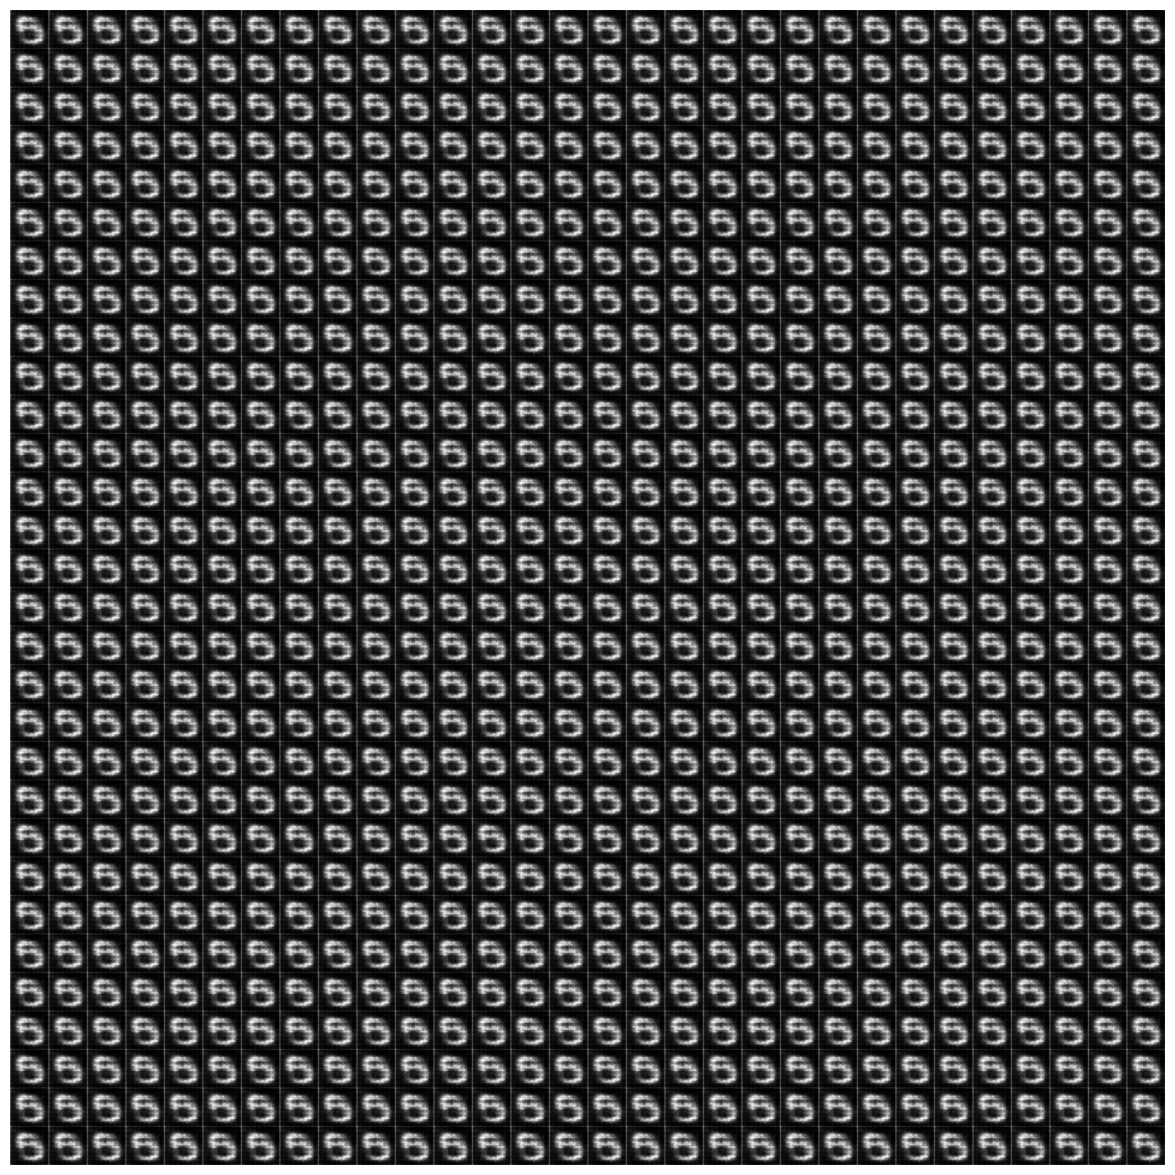

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

dir = "/content/drive/MyDrive/Colab Notebooks/"
decoder = load_model(dir + 'decoder_mnist.keras')

n = 30
digit_size = 128
figure = np.zeros((digit_size * n, digit_size * n,1))

grid_x = np.linspace(-1, 1, n)
grid_y = np.linspace(-1, 1, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi,0.,0.1]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size,1)
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
        ] = digit

plt.figure(figsize=(15, 15))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.axis("off")
plt.imshow(figure, cmap="Greys_r")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


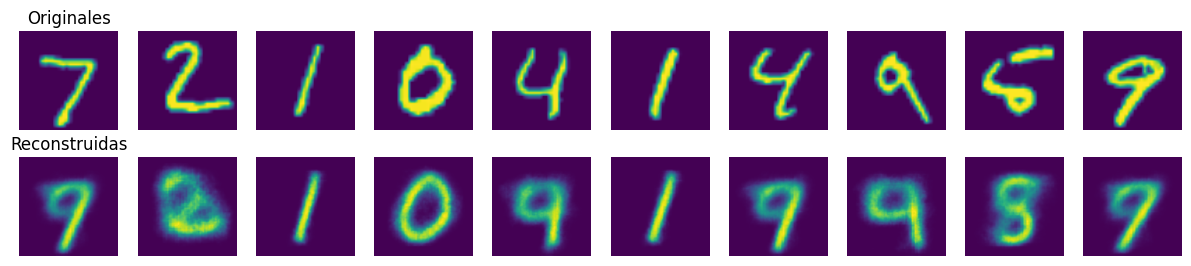

In [ ]:
#Visualizacion

dir = "/content/drive/MyDrive/Colab Notebooks/"
encoder = load_model(dir + 'encoder_mnist.keras')
decoder = load_model(dir + 'decoder_mnist.keras')

encoder_imgs = encoder.predict(x_test[:10])
decoded_imgs = decoder.predict(encoder_imgs)


fig, axes = plt.subplots(2, 10, figsize=(15, 3))

for i in range(10):
    axes[0, i].imshow(x_test[i])
    axes[0, i].axis("off")

    axes[1, i].imshow(decoded_imgs[i])
    axes[1, i].axis("off")

axes[0, 0].set_title("Originales")
axes[1, 0].set_title("Reconstruidas")
plt.show()